# Official Confidence Tube Results
*As of 9/30/24*

Author: Jimmy Butler

In [42]:
# load packages
library(ggplot2)
library(dplyr)
library(mvtnorm)
library(data.table)
library(gridExtra)
library(cowplot)

# load perlmutter scratch filepath signature
perlpath <- Sys.getenv('PSCRATCH')

# load self-made functions
source('~/isolines_uq/scripts/R/auxiliary_scripts/distributionIsolines.R')
source('~/isolines_uq/scripts/R/auxiliary_scripts/utils.R')

## Non-Extreme Isolines, Using Empirical Survival Function Only

### Bivariate t

#### $\beta(n) = \frac{1}{\sqrt{n}}$

This was the choice of $\beta(n)$ that I had been using for a while, and seemed to mostly work pretty well.

**Main takeaways:**
+ Seems like it works pretty well, stabilizes as $n \to \infty$

**Things to think about:**
+ Doing a simulation with an even higher sample size (say, a million?) to see definitively if coverage just goes down?

In [23]:
# loading the dataframe of results
bivt_path <- paste0(perlpath, '/sims/regions/base_coverage_empsurv/bivt/400x400_on_[-2,5]x[-2,5]/isolinenumCoords_500.RData')
bivt_res <- readRDS(bivt_path)
bivt_res$n <- as.integer(bivt_res$n)

bivt_path <- paste0(perlpath, '/sims/regions/base_coverage_empsurv/bivt/400x400_on_[-2,5]x[-2,5]/n2e+06isolinenumCoords_500.RData')
bivt_res_2 <- readRDS(bivt_path)
bivt_res_2$n <- as.integer(bivt_res_2$n)

bivt_res = rbind(bivt_res, bivt_res_2)

res <- bivt_res %>% 
group_by(n, alpha, p, beta_func) %>% 
summarize(covrate=mean(covered))

# alpha for 1-alpha binomial confidence intervals 
meta_alpha <- 0.05
uncertainty <- qnorm(1-(meta_alpha/2))*(sqrt((res$covrate*(1-res$covrate))/500))
uncertainty <- round(uncertainty, 3)
res$uncertainty <- uncertainty
res <- res %>% filter(n %in% c(1000, 10000, 100000, 1000000))

`summarise()` has grouped output by 'n', 'alpha', 'p'. You can override using
the `.groups` argument.


In [24]:
a <- 0.01
beta_label <- '0.5'
plt1 <- ggplot(res %>% filter(alpha==a, beta_func==beta_label), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.15), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))


a <- 0.05
plt2 <- ggplot(res %>% filter(alpha==a, beta_func==beta_label), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.15), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))


a <- 0.1
plt3 <- ggplot(res %>% filter(alpha==a, beta_func==beta_label), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, \u03b1 = ', a)) +  
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.15), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

In [25]:
ggsave('~/isolines_uq/plots/bivt_005.png', plt2, height=7, width=7)

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


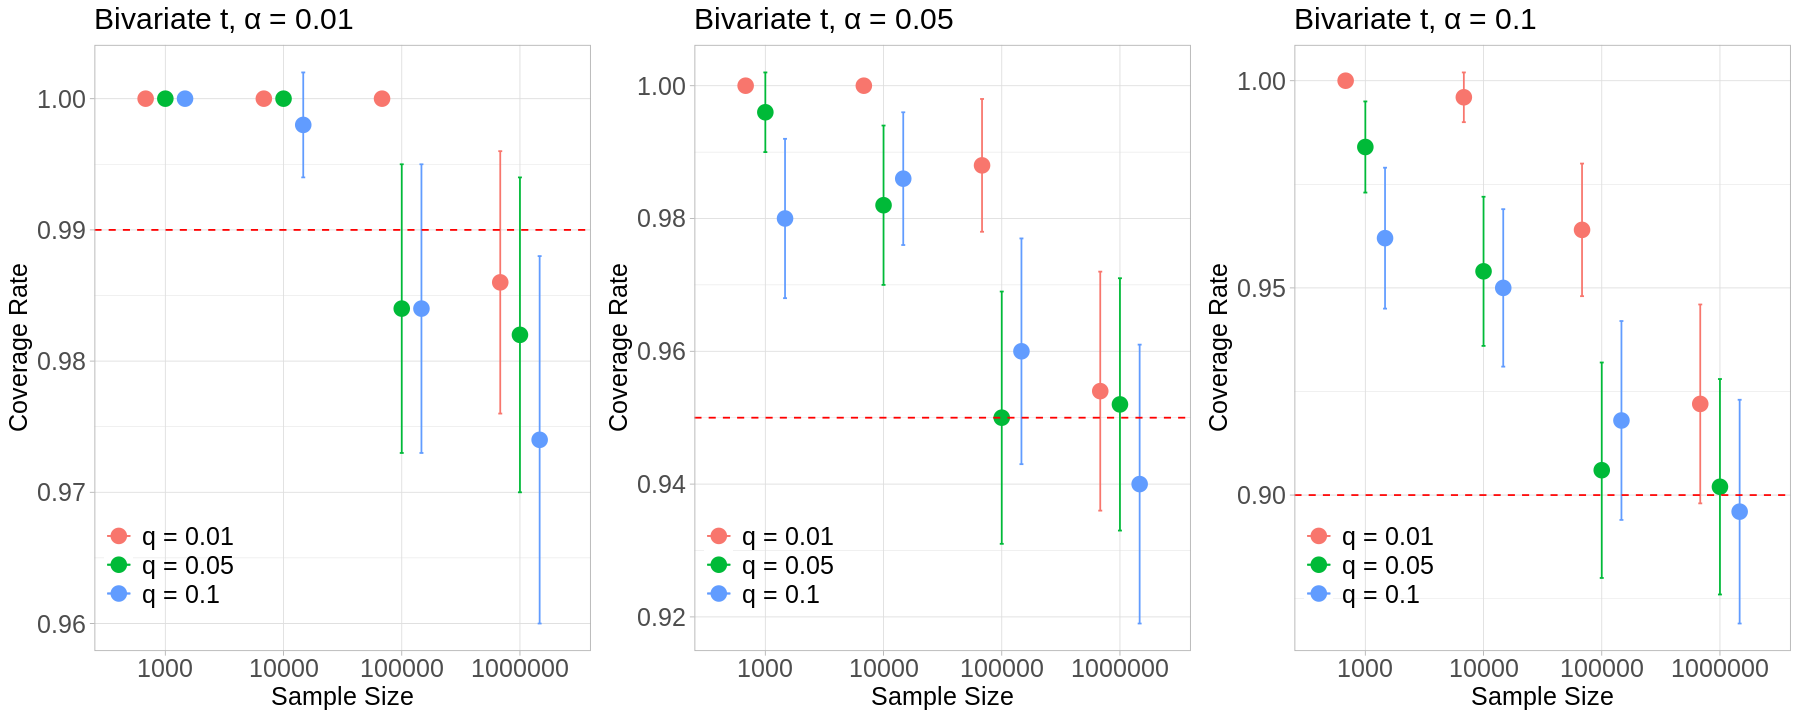

In [26]:
options(repr.plot.width=15, repr.plot.height=6)
p = cowplot::plot_grid(plt1, plt2, plt3,
                   ncol = 3,
                   rel_heights = c(2, 1/2))
ggsave('~/isolines_uq/plots/bivt_base_cov_sqrt.png', p, height=7, width=21)
p

#### $\beta(n) = \sqrt{\frac{\log n}{n}}$

This was the choice of $\beta(n)$ that Wolfgang Polonik suggested, and that actually seems to guarantee one of the conditions of asymptotic coverage is satisfied (Condition P1).

**Main takeaways:**
+ Obviously coverage is higher than for the last choice of $\beta(n)$, but still decreases (wonder if it will stabilize?)

**Things to think about:**
+ Doing a simulation with an even higher sample size (say, a million?) to see definitively if coverage just goes down?

In [27]:
a <- 0.01
beta_label <- 'sqrt(log(n)/n)'
plt1 <- ggplot(res %>% filter(alpha==a, beta_func==beta_label), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, \u03b1 = ', a)) +  
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.15), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

a <- 0.05
plt2 <- ggplot(res %>% filter(alpha==a, beta_func==beta_label), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.15), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

a <- 0.1
plt3 <- ggplot(res %>% filter(alpha==a, beta_func==beta_label), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate t, \u03b1 = ', a)) +  
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.15), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


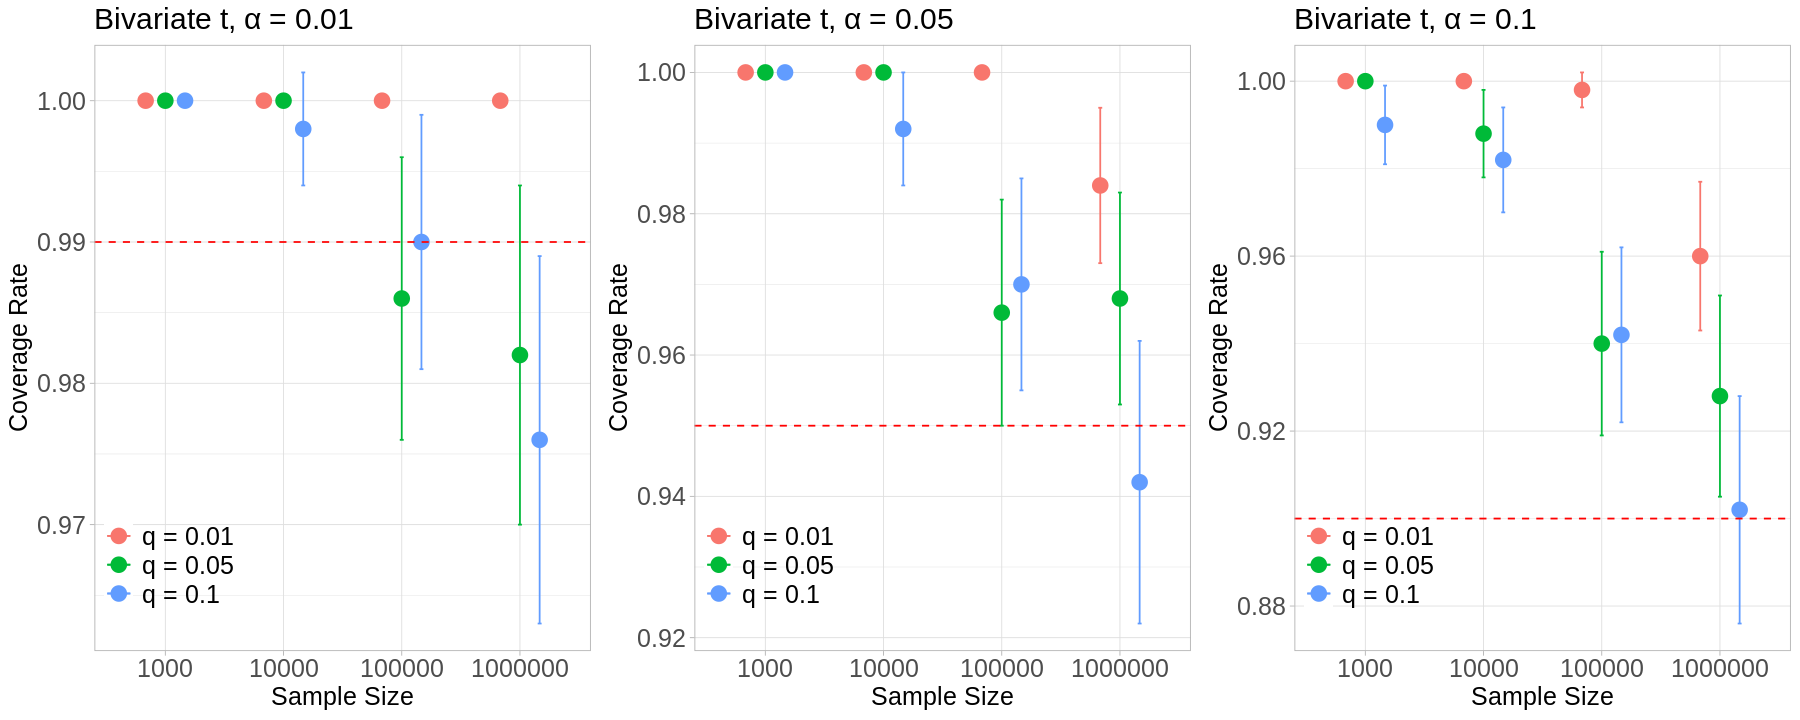

In [28]:
options(repr.plot.width=15, repr.plot.height=6)
p = cowplot::plot_grid(plt1, plt2, plt3,
                   ncol = 3,
                   rel_heights = c(2, 1/2))
ggsave('~/isolines_uq/plots/bivt_base_cov_log.png', p, height=7, width=21)
p

In [29]:
ggsave('~/isolines_uq/plots/bivt_005.png', plt2, height=7, width=7)

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


### Bivariate Gaussian

#### $\beta(n) = \frac{1}{\sqrt{n}}$

This was the choice of $\beta(n)$ that I had been using for a while, and seemed to mostly work pretty well.

**Main takeaways:**
+ Similar to bivariate t

**Things to think about:**
+ Similar to bivariate t

In [18]:
# loading the dataframe of results
bivgauss_path <- paste0(perlpath, '/sims/regions/base_coverage_empsurv/bivgauss/400x400_on_[-2,5]x[-2,5]/isolinenumCoords_500.RData')
bivgauss_res <- readRDS(bivgauss_path)
bivgauss_res$n <- as.integer(bivgauss_res$n)

bivgauss_path <- paste0(perlpath, '/sims/regions/base_coverage_empsurv/bivgauss/400x400_on_[-2,5]x[-2,5]/n2e+06isolinenumCoords_500.RData')
bivgauss_res_2 <- readRDS(bivgauss_path)
bivgauss_res_2$n <- as.integer(bivgauss_res_2$n)

bivgauss_res = rbind(bivgauss_res, bivgauss_res_2)

res <- bivgauss_res %>% 
group_by(n, alpha, p, beta_func) %>% 
summarize(covrate=mean(covered))

# alpha for 1-alpha binomial confidence intervals 
meta_alpha <- 0.05
uncertainty <- qnorm(1-(meta_alpha/2))*(sqrt((res$covrate*(1-res$covrate))/500))
uncertainty <- round(uncertainty, 3)
res$uncertainty <- uncertainty
res <- res %>% filter(n %in% c(1000, 10000, 100000, 1000000))

`summarise()` has grouped output by 'n', 'alpha', 'p'. You can override using
the `.groups` argument.


In [19]:
a <- 0.01
beta_label <- '0.5'
plt1 <- ggplot(res %>% filter(alpha==a, beta_func==beta_label), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate Gaussian, \u03b1 = ', a)) +  
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.15), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

a <- 0.05
plt2 <- ggplot(res %>% filter(alpha==a, beta_func==beta_label), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate Gaussian, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.15), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

a <- 0.1
plt3 <- ggplot(res %>% filter(alpha==a, beta_func==beta_label), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate Gaussian, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.15), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


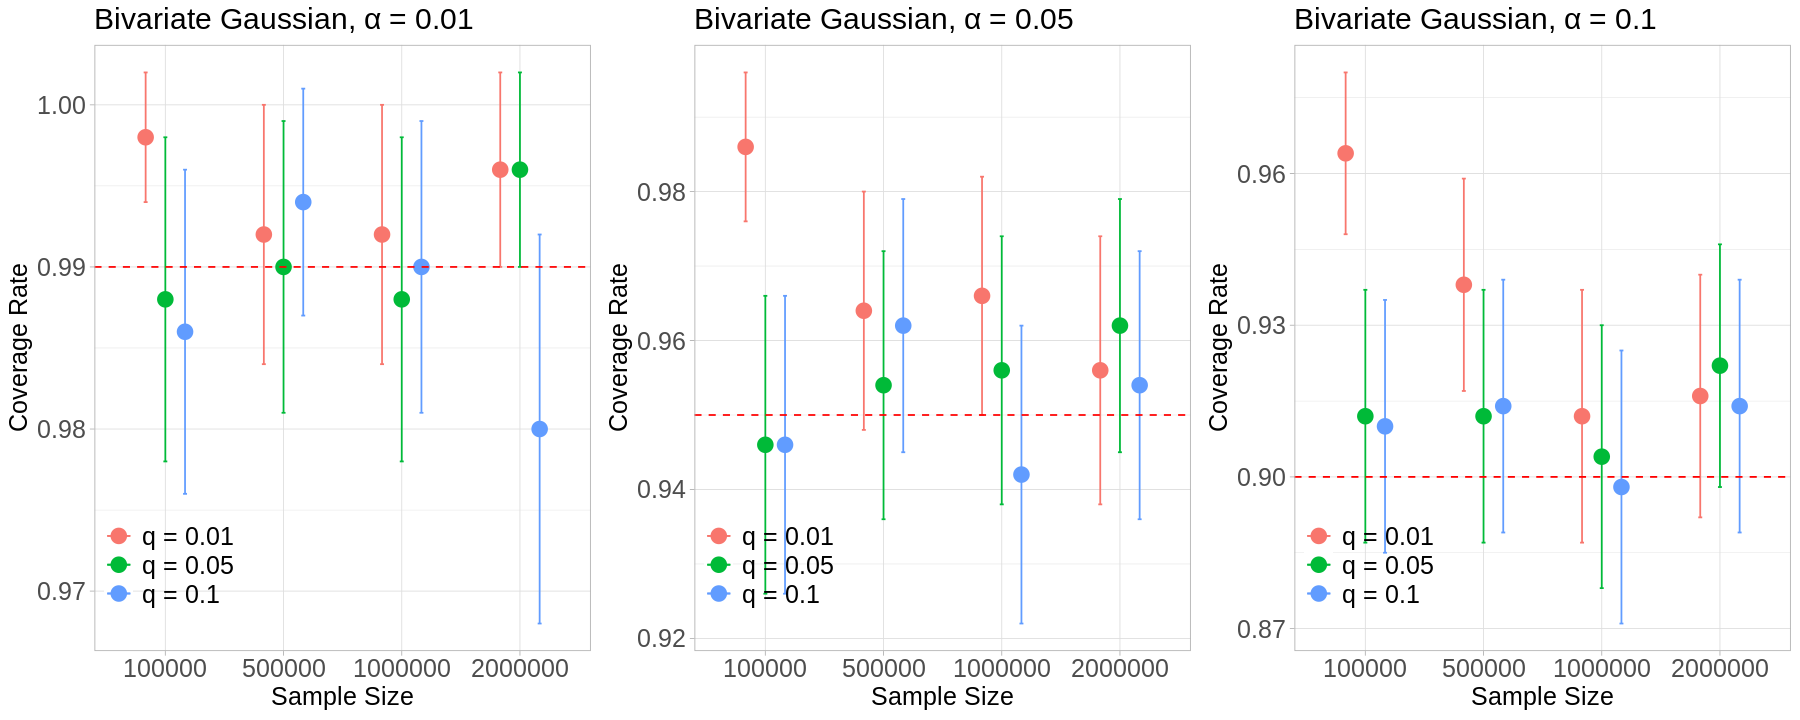

In [12]:
options(repr.plot.width=15, repr.plot.height=6)
p = cowplot::plot_grid(plt1, plt2, plt3,
                   ncol = 3,
                   rel_heights = c(2, 1/2))
ggsave('~/isolines_uq/plots/bivgauss_base_cov_sqrt.png', p, height=7, width=21)
p

#### $\beta(n) = \sqrt{\frac{\log n}{n}}$

This was the choice of $\beta(n)$ that Wolfgang Polonik suggested, and that actually seems to guarantee one of the conditions of asymptotic coverage is satisfied (Condition P1).

**Main takeaways:**
+ Same as bivariate t

**Things to think about:**
+ Same as bivariate t

In [20]:
a <- 0.01
beta_label <- 'sqrt(log(n)/n)'
plt1 <- ggplot(res %>% filter(alpha==a, beta_func==beta_label), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate Gaussian, \u03b1 = ', a)) +  
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.15), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

a <- 0.05
plt2 <- ggplot(res %>% filter(alpha==a, beta_func==beta_label), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate Gaussian, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.15), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

a <- 0.1
plt3 <- ggplot(res %>% filter(alpha==a, beta_func==beta_label), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate Gaussian, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.15), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


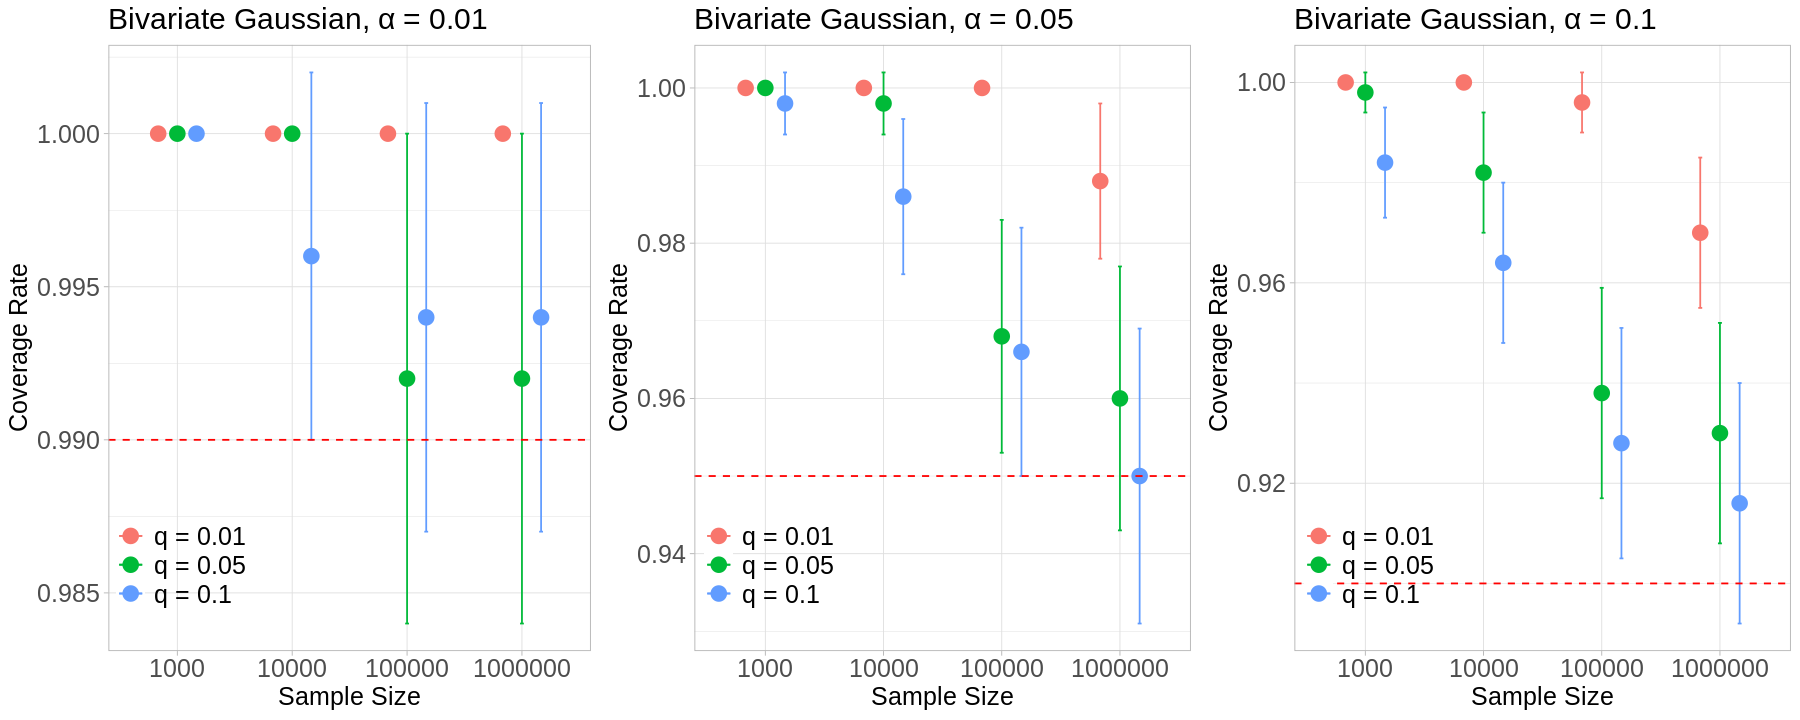

In [21]:
options(repr.plot.width=15, repr.plot.height=6)
p = cowplot::plot_grid(plt1, plt2, plt3,
                   ncol = 3,
                   rel_heights = c(2, 1/2))
ggsave('~/isolines_uq/plots/bivgauss_base_cov_log.png', p, height=7, width=21)
p

In [22]:
ggsave('~/isolines_uq/plots/bivgauss_005.png', plt2, height=7, width=7)

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


### Karachi Data Distribution

#### $\beta(n) = \frac{1}{\sqrt{n}}$

This was the choice of $\beta(n)$ that I had been using for a while, and seemed to mostly work pretty well.

**Main takeaways:**
+ Coverage actually seems to drop below the nominal rates, even considering uncertainties..

**Things to think about:**
+ Useful to go up to a million to see if this trend continues to happen.

In [12]:
# loading the dataframe of results
bivkarachi_path <- paste0(perlpath, '/sims/regions/base_coverage_empsurv/karachi/400x400_on_[50,140]x[0,100]/isolinenumCoords_500.RData')
bivkarachi_res <- readRDS(bivkarachi_path)
bivkarachi_res$n <- as.integer(bivkarachi_res$n)

karachi_path <- paste0(perlpath, '/sims/regions/base_coverage_empsurv/karachi/400x400_on_[50,140]x[0,100]/n2e+06isolinenumCoords_500.RData')
karachi_res_2 <- readRDS(karachi_path)
karachi_res_2$n <- as.integer(karachi_res_2$n)

bivkarachi_res = rbind(bivkarachi_res, karachi_res_2)

res <- bivkarachi_res %>% 
group_by(n, alpha, p, beta_func) %>% 
summarize(covrate=mean(covered))

# alpha for 1-alpha binomial confidence intervals 
meta_alpha <- 0.05
uncertainty <- qnorm(1-(meta_alpha/2))*(sqrt((res$covrate*(1-res$covrate))/500))
uncertainty <- round(uncertainty, 3)
res$uncertainty <- uncertainty
res <- res %>% filter(n %in% c(1000, 10000, 100000, 1000000))

`summarise()` has grouped output by 'n', 'alpha', 'p'. You can override using
the `.groups` argument.


In [13]:
a <- 0.01
beta_label <- '0.5'
plt1 <- ggplot(res %>% filter(alpha==a, beta_func==beta_label), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Karachi, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.15), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

a <- 0.05
plt2 <- ggplot(res %>% filter(alpha==a, beta_func==beta_label), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Karachi, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.15), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

a <- 0.1
plt3 <- ggplot(res %>% filter(alpha==a, beta_func==beta_label), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Karachi, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.15), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


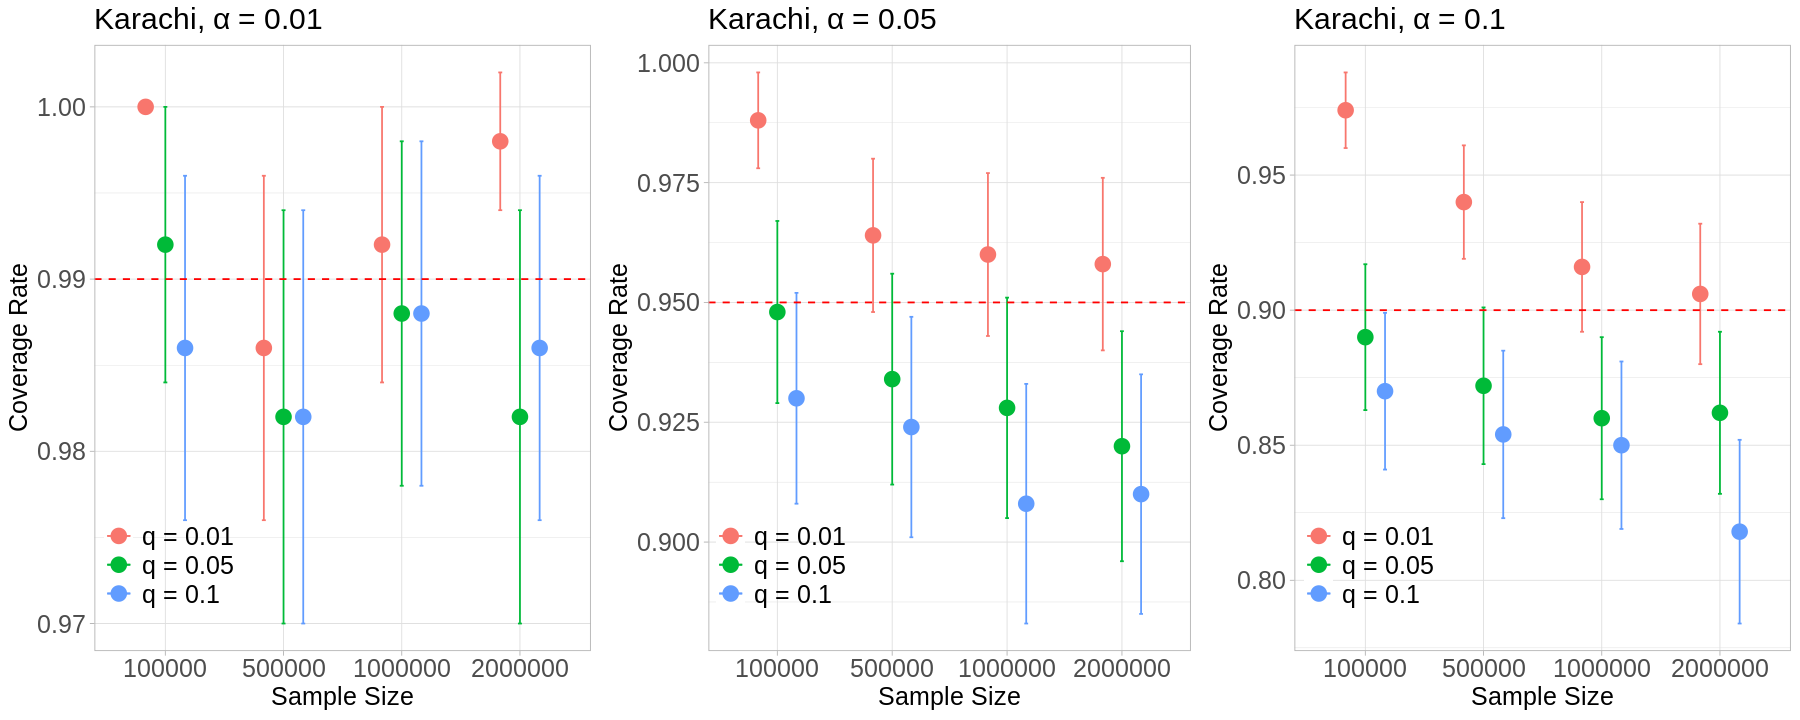

In [17]:
options(repr.plot.width=15, repr.plot.height=6)
p = cowplot::plot_grid(plt1, plt2, plt3,
                   ncol = 3,
                   rel_heights = c(2, 1/2))
ggsave('~/isolines_uq/plots/karachi_base_cov_sqrt.png', p, height=7, width=21)
p

#### $\beta(n) = \sqrt{\frac{\log n}{n}}$

This was the choice of $\beta(n)$ that Wolfgang Polonik suggested, and that actually seems to guarantee one of the conditions of asymptotic coverage is satisfied (Condition P1).

**Main takeaways:**
+ Coverage is higher and obviously coverage is dropping off still but it has not yet fallen below the nominal rates in any cases. However, it doesn't seem to be flatlining, maybe good to do a ton of points just to test the limits of this.

**Things to think about:**
+ Doing a simulation with an even higher sample size (say, a million?) to see definitively if coverage just goes down?

In [15]:
a <- 0.01
beta_label <- 'sqrt(log(n)/n)'
plt1 <- ggplot(res %>% filter(alpha==a, beta_func==beta_label), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Karachi, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.15), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

a <- 0.05
plt2 <- ggplot(res %>% filter(alpha==a, beta_func==beta_label), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Karachi, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.15), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

a <- 0.1
plt3 <- ggplot(res %>% filter(alpha==a, beta_func==beta_label), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Karachi, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.15), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


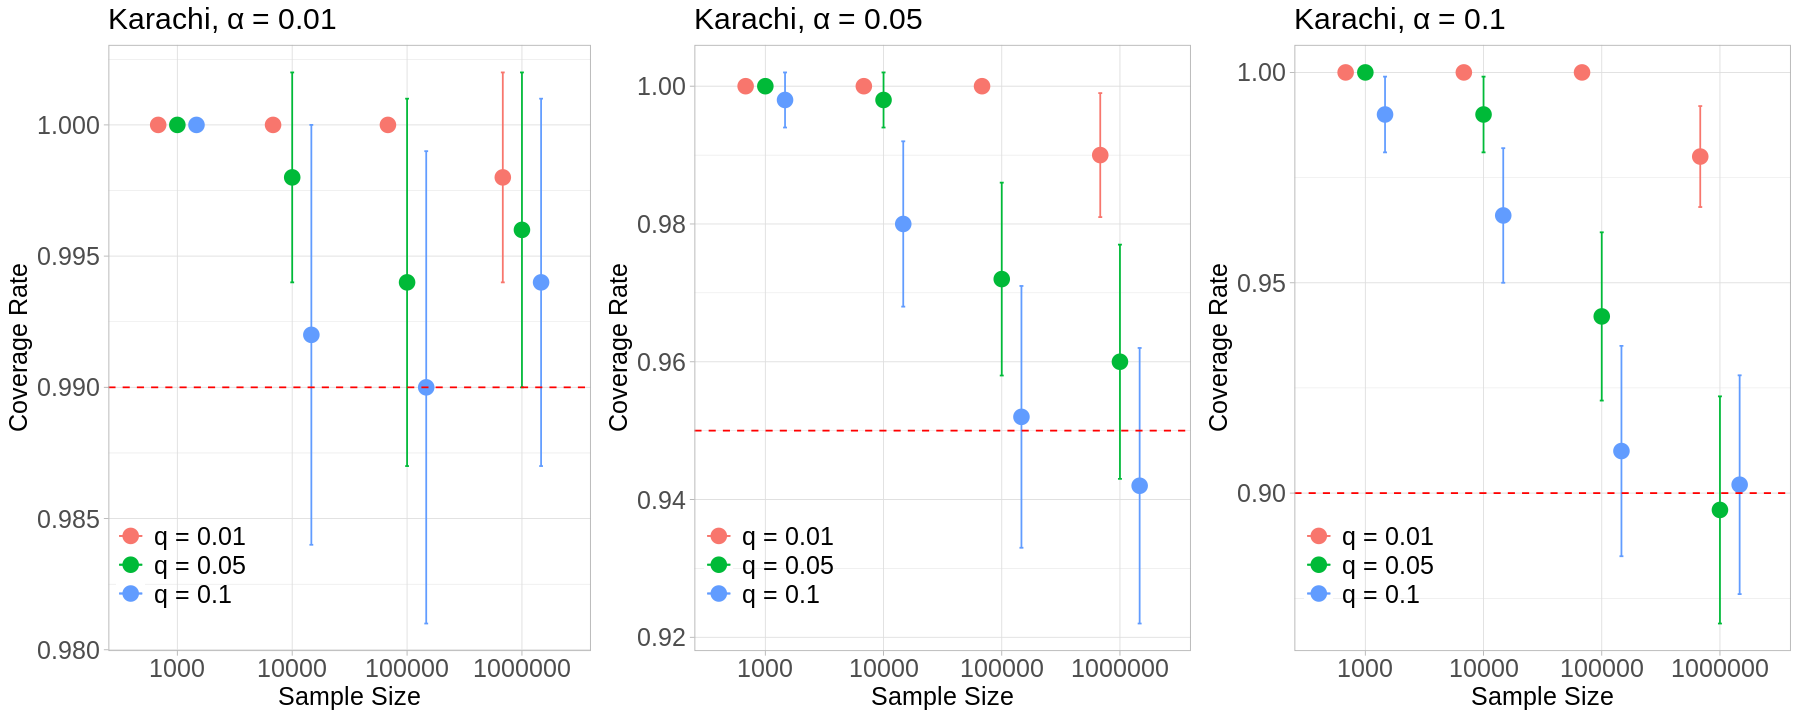

In [16]:
options(repr.plot.width=15, repr.plot.height=6)
p = cowplot::plot_grid(plt1, plt2, plt3,
                   ncol = 3,
                   rel_heights = c(2, 1/2))
ggsave('~/isolines_uq/plots/karachi_base_cov_log.png', p, height=7, width=21)
p

In [17]:
ggsave('~/isolines_uq/plots/bivkarachi_005.png', plt2, height=7, width=7)

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


## Non-Extreme Isolines: Parametric Bootstrap with Empirical Survival Function

In [43]:
# loading the dataframe of results
bivgauss_path <- paste0(perlpath, '/sims/regions/base_coverage_empsurv_smoothboot/bivgauss/400x400_on_[-2,5]x[-2,5]/n1000_10000_1e+05_5e+05_1e+06isolinenumCoords_500.RData')
bivgauss_res <- readRDS(bivgauss_path)
bivgauss_res$n <- as.integer(bivgauss_res$n)

res <- bivgauss_res %>% 
group_by(n, alpha, p, beta_func) %>% 
summarize(covrate=mean(covered))

# alpha for 1-alpha binomial confidence intervals 
meta_alpha <- 0.05
uncertainty <- qnorm(1-(meta_alpha/2))*(sqrt((res$covrate*(1-res$covrate))/500))
uncertainty <- round(uncertainty, 3)
res$uncertainty <- uncertainty
res <- res %>% filter(n %in% c(1000, 10000, 100000, 500000, 1000000))

`summarise()` has grouped output by 'n', 'alpha', 'p'. You can override using
the `.groups` argument.


In [4]:
a <- 0.01
beta_label <- 'sqrt(log(n)/n)'
plt1 <- ggplot(res %>% filter(alpha==a, beta_func==beta_label), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate Gaussian, \u03b1 = ', a)) +  
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.15), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

a <- 0.05
plt2 <- ggplot(res %>% filter(alpha==a, beta_func==beta_label), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate Gaussian, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.15), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

a <- 0.1
plt3 <- ggplot(res %>% filter(alpha==a, beta_func==beta_label), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate Gaussian, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.15), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

In [5]:
options(repr.plot.width=15, repr.plot.height=6)
p = cowplot::plot_grid(plt1, plt2, plt3,
                   ncol = 3,
                   rel_heights = c(2, 1/2))
ggsave('~/isolines_uq/plots/bivgauss_base_sqrt_smoothboot.png', p, height=7, width=21)

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


In [6]:
a <- 0.01
beta_label <- '0.5'
plt1 <- ggplot(res %>% filter(alpha==a, beta_func==beta_label), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate Gaussian, \u03b1 = ', a)) +  
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.15), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

a <- 0.05
plt2 <- ggplot(res %>% filter(alpha==a, beta_func==beta_label), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate Gaussian, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.15), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

a <- 0.1
plt3 <- ggplot(res %>% filter(alpha==a, beta_func==beta_label), aes(color=as.factor(p))) + 
geom_point(aes(x=as.factor(n), y=covrate), size = 4, position=position_dodge(width=0.5)) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_line(aes(x=as.factor(n), y=covrate)) + theme_light() + 
ggtitle(paste0('Bivariate Gaussian, \u03b1 = ', a)) + 
scale_color_discrete(labels = paste0('q = ', as.character(unique(res$p)))) +
theme(legend.title=element_blank(), legend.position=c(0.15,0.15), 
      legend.background=element_blank(), axis.text.x=element_text(size=15), axis.text.y=element_text(size=15),
     axis.title.x=element_text(size=15), axis.title.y=element_text(size=15), plot.title = element_text(size=18),
     legend.text=element_text(size=15))

In [7]:
options(repr.plot.width=15, repr.plot.height=6)
p = cowplot::plot_grid(plt1, plt2, plt3,
                   ncol = 3,
                   rel_heights = c(2, 1/2))
ggsave('~/isolines_uq/plots/bivgauss_base_log_smoothboot.png', p, height=7, width=21)

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


In [59]:
confregs = readRDS('/pscratch/sd/j/jbbutler/sims/regions/base_confregs_empsurv_smoothboot/bivgauss/400x400_on_[-2,5]x[-2,5]/1000n_500B_400x400_on_[-2,5]x[-2,5]_bivgauss_empirical/simulation_1.RData')

In [45]:
names(confregs)

[1] "beta0.5_p0.05_alpha0.01"            "beta0.5_p0.05_alpha0.05"           
 [3] "beta0.5_p0.05_alpha0.1"             "betasqrt(log(n)/n)_p0.05_alpha0.01"
 [5] "betasqrt(log(n)/n)_p0.05_alpha0.05" "betasqrt(log(n)/n)_p0.05_alpha0.1" 
 [7] "beta0.5_p0.01_alpha0.01"            "beta0.5_p0.01_alpha0.05"           
 [9] "beta0.5_p0.01_alpha0.1"             "betasqrt(log(n)/n)_p0.01_alpha0.01"
[11] "betasqrt(log(n)/n)_p0.01_alpha0.05" "betasqrt(log(n)/n)_p0.01_alpha0.1" 
[13] "beta0.5_p0.1_alpha0.01"             "beta0.5_p0.1_alpha0.05"            
[15] "beta0.5_p0.1_alpha0.1"              "betasqrt(log(n)/n)_p0.1_alpha0.01" 
[17] "betasqrt(log(n)/n)_p0.1_alpha0.05"  "betasqrt(log(n)/n)_p0.1_alpha0.1"  
[19] "data"

In [60]:
dat <- confregs$data
bhat <- confregs[[8]]$bhat
p <- confregs[[8]]$p

In [61]:
tubes <- drawTubeBoundsES(dat, 100, bhat, p, c(-2,-2), c(10, 10))

In [62]:
multivariate_isoline <- drawBivGaussIsoline(numCoords=100, gridUbs=c(10, 10), gridLbs = c(-2,-2), prob=p)

In [65]:
options(repr.plot.width=7, repr.plot.height=7, scipen=999)

polygon1 <- rbind(tubes$top, 
                 data.frame(t(rev(data.frame(t(tubes$bottom))))))

plt <- ggplot() +
geom_line(data=tubes$top, aes(x=X1, y=X2)) +
geom_line(data=tubes$bottom, aes(x=X1, y=X2)) +
geom_line(data=multivariate_isoline, aes(x=X1, y=X2)) +
#geom_polygon(data=polygon1, aes(x=X1, y=X2, fill='0.01-tube'), alpha=0.2) +
coord_cartesian(ylim=c(0, 3), xlim = c(0, 3), expand=FALSE) + 
theme_light() +
theme(legend.position = c(0.80, 0.2), 
      legend.title = element_blank(), 
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 20), 
      legend.spacing.y = unit(0.002, 'cm'),
      text = element_text(size = 20),
      plot.title = element_text(size=24),
      legend.text = element_text(size=20),
      legend.background = element_blank(),
      legend.box.background = element_rect(fill = "white", color = "black"),
      plot.margin = margin(1,25,1,1))

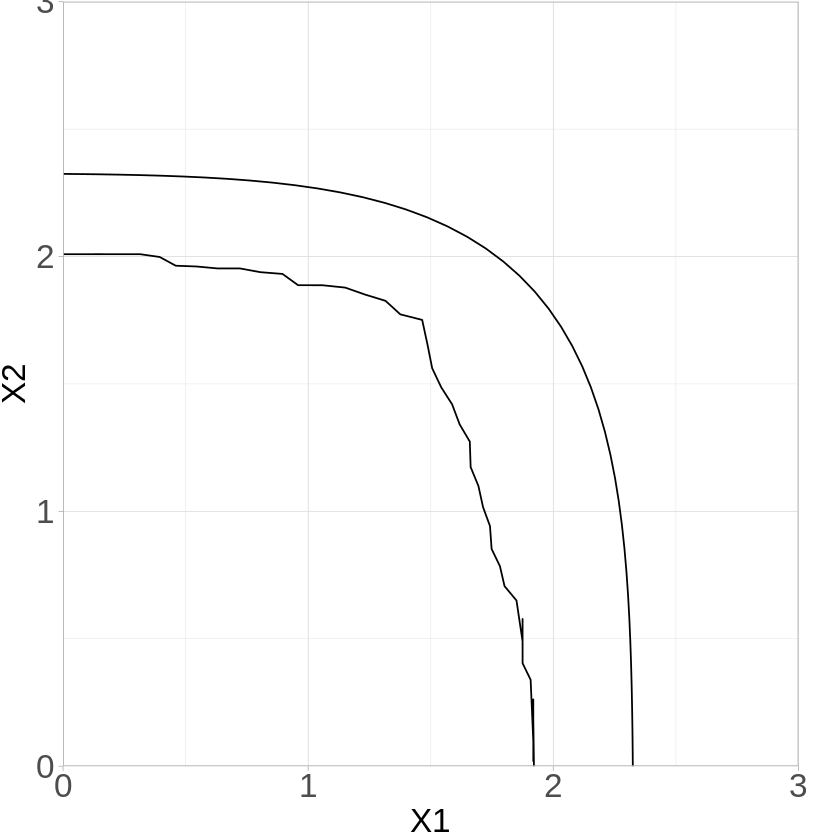

In [66]:
plt

In [38]:
name <- 'beta0.5_p0.05_alpha0.05'
nonpar_boot_files <- list.files('/pscratch/sd/j/jbbutler/sims/regions/base_confregs_empsurv/bivgauss/400x400_on_[-2,5]x[-2,5]/1e+06n_500B_400x400_on_[-2,5]x[-2,5]_bivgauss_empirical/')
smooth_boot_files <- list.files('/pscratch/sd/j/jbbutler/sims/regions/base_confregs_empsurv_smoothboot/bivgauss/400x400_on_[-2,5]x[-2,5]/1e+06n_500B_400x400_on_[-2,5]x[-2,5]_bivgauss_empirical/')

nonpar_bhats <- rep(NA, length(nonpar_boot_files))
smooth_boot_files <- rep(NA, length(smooth_boot_files))

for (i in 1:length(nonpar_boot_files)) {
    
    confregs = readRDS(paste0('/pscratch/sd/j/jbbutler/sims/regions/base_confregs_empsurv/bivgauss/400x400_on_[-2,5]x[-2,5]/1e+06n_500B_400x400_on_[-2,5]x[-2,5]_bivgauss_empirical/', nonpar_boot_files[i]))
    nonpar_bhats[i] <- confregs[[name]]$bhat
    confregs = readRDS(paste0('/pscratch/sd/j/jbbutler/sims/regions/base_confregs_empsurv_smoothboot/bivgauss/400x400_on_[-2,5]x[-2,5]/1e+06n_500B_400x400_on_[-2,5]x[-2,5]_bivgauss_empirical/', smooth_boot_files[i]))
    smooth_boot_bhats[i] <- confregs[[name]]$bhat
    
}

Warning message in gzfile(file, "rb"):
“cannot open compressed file '/pscratch/sd/j/jbbutler/sims/regions/base_confregs_empsurv_smoothboot/bivgauss/400x400_on_[-2,5]x[-2,5]/1e+06n_500B_400x400_on_[-2,5]x[-2,5]_bivgauss_empirical/NA', probable reason 'No such file or directory'”


ERROR: Error in gzfile(file, "rb"): cannot open the connection


In [29]:
paste0('/pscratch/sd/j/jbbutler/sims/regions/base_confregs_empsurv/bivgauss/400x400_on_[-2,5]x[-2,5]/1e+06n_500B_400x400_on_[-2,5]x[-2,5]_bivgauss_empirical/', nonpar_boot_files[i])

[1] "/pscratch/sd/j/jbbutler/sims/regions/base_confregs_empsurv/bivgauss/400x400_on_[-2,5]x[-2,5]/1e+06n_500B_400x400_on_[-2,5]x[-2,5]_bivgauss_empirical/simulation_1.RData"

In [40]:
smooth_boot_files

[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [26] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [51] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
 [76] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[101] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[126] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[151] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[176] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[201] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[226] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[251] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[276] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[301] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[326] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[351] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[376] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[401] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[426] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[451] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[476] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA